In [1]:
pwd

'C:\\Users\\user\\Desktop\\AIMS\\GATSIBO'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker 
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')

# GATSIBO GMFD modeling 1980-2010

In [3]:
bg = pd.read_csv(r"GatsiboGmfd.csv")

yld=bg['Yields'].mean()
bg['Avg_yields']=yld
bg['DYields']=bg['Yields']-bg['Avg_yields']

prep=bg['PREP'].mean()
bg['Avg_prep']=prep
bg['DPREP']=bg['PREP']-bg['Avg_prep']


temp=bg['TMP'].mean()
bg['Avg_TMP']=temp
bg['DTMP']=bg['TMP']-bg['Avg_TMP']


bg["DYields"] = (bg["DYields"]/yld)*100
bg["DPREP"] = (bg["DPREP"]/prep)*100
bg.head(10)

,Years,Yields,PREP,SRAD,TMAX,TMIN,TMP,Avg_yields,DYields,Avg_prep,DPREP,Avg_TMP,DTMP
0,1980,5729,394.700002,17.552985,26.626119,14.616418,20.621269,4921.419355,16.409507,425.006451,-7.130821,21.088957,-0.467688
1,1981,6059,489.800002,16.920863,26.238129,14.284892,20.261511,4921.419355,23.114889,425.006451,15.245310,21.088957,-0.827446
2,1982,4401,451.400001,16.984173,26.423741,14.523022,20.473381,4921.419355,-10.574579,425.006451,6.210153,21.088957,-0.615576
3,1983,5498,346.500001,17.413636,27.051515,14.925758,20.988636,4921.419355,11.715739,425.006451,-18.471826,21.088957,-0.100321
4,1984,4576,351.699999,20.398658,26.506711,13.911409,20.209060,4921.419355,-7.018694,425.006451,-17.248315,21.088957,-0.879897
5,1985,4508,545.600005,17.793617,25.951064,14.193617,20.072340,4921.419355,-8.400409,425.006451,28.374523,21.088957,-1.016617
6,1986,5909,493.500000,17.618248,26.386131,14.510219,20.448175,4921.419355,20.066988,425.006451,16.115884,21.088957,-0.640782
7,1987,5806,447.800001,18.482308,27.041538,15.080000,21.060769,4921.419355,17.974096,425.006451,5.363107,21.088957,-0.028188
8,1988,5630,386.400000,17.738760,27.902326,14.254264,21.078295,4921.419355,14.397892,425.006451,-9.083733,21.088957,-0.010662
9,1989,5223,401.499997,17.443836,26.283562,13.893151,20.088356,4921.419355,6.127920,425.006451,-5.530846,21.088957,-1.000601


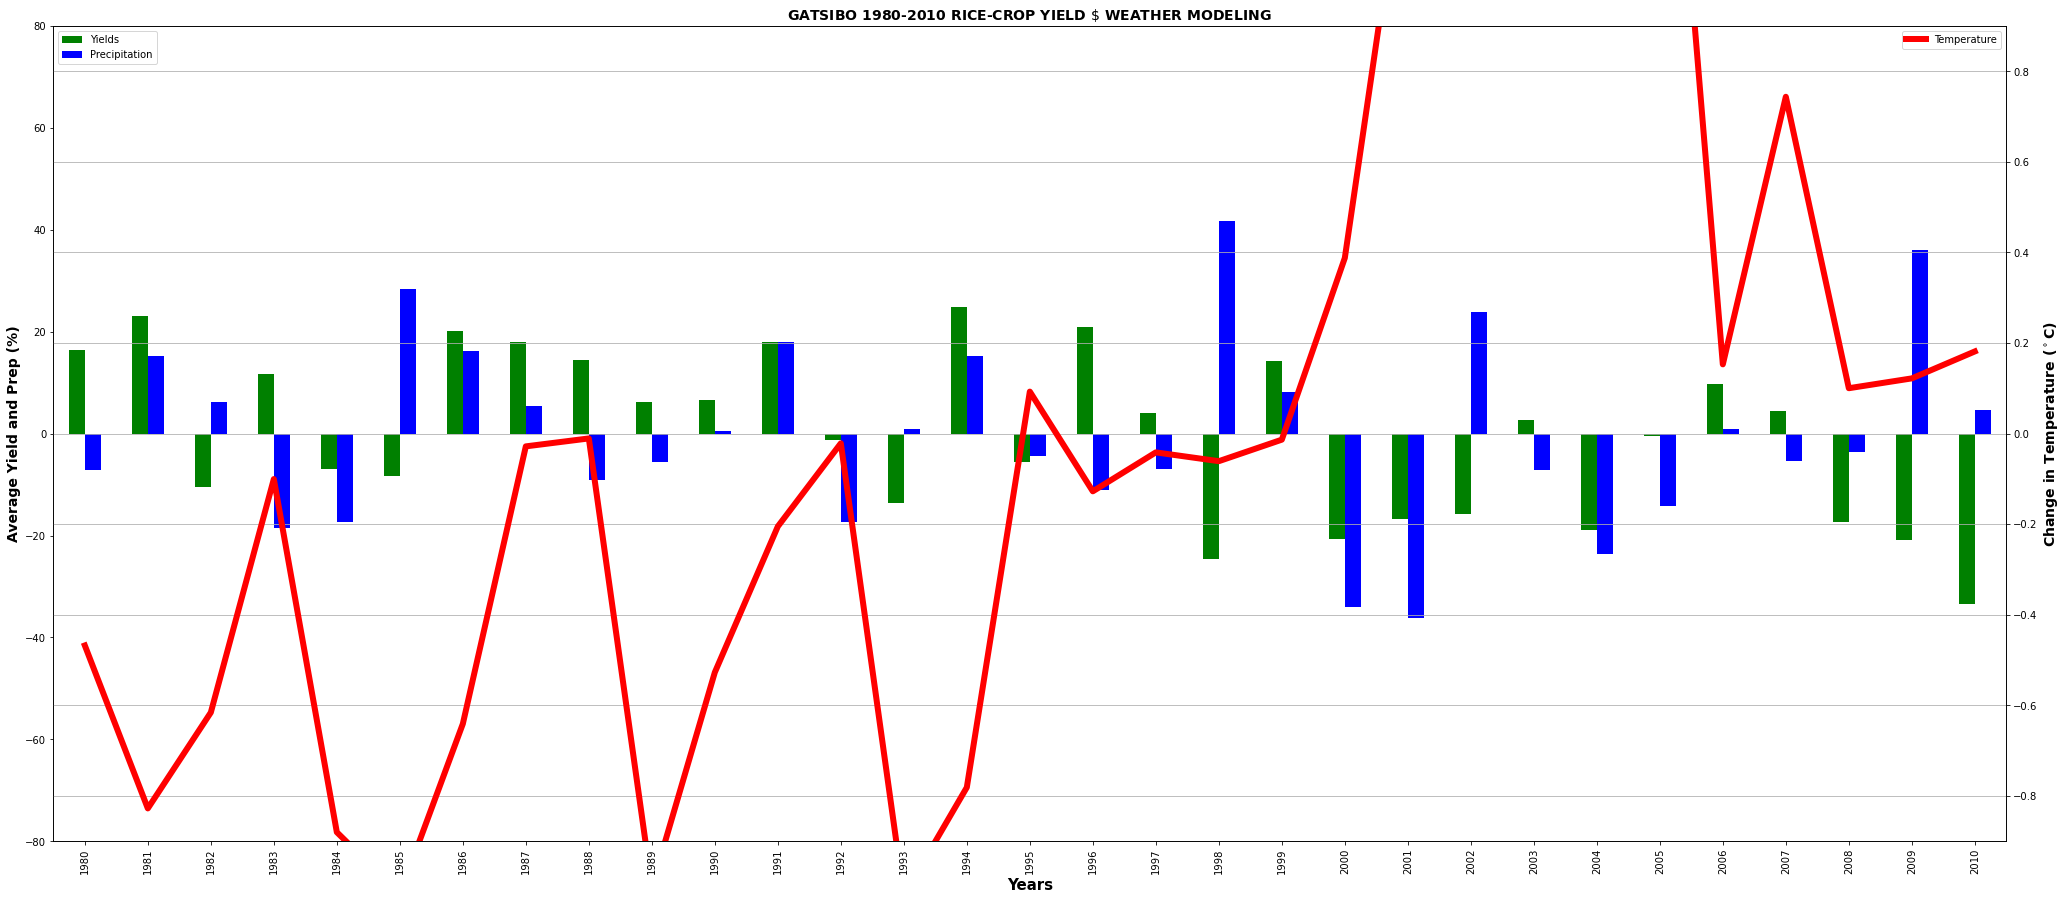

In [4]:
ax=bg.plot(x='Years',y=['DYields','DPREP'],kind='bar',figsize=(35,15),label=['Yields','Precipitation'],color=['g','b'])
width_scale = 0.60
ax.set_ylim(-80,80)
plt.legend(loc='upper left')
plt.xlabel('Years', fontsize = 15, weight = 'bold')
plt.ylabel('Average Yield and Prep (%)', fontsize = 14, weight = 'bold')


ax2 = ax.twinx()
bg.plot(y='DTMP',kind='line',color= 'r',ax=ax2,label='Temperature',LW=6)
ax2.set_ylim(-0.9,0.9)
plt.title('GATSIBO 1980-2010 RICE-CROP YIELD $\$$ WEATHER MODELING', fontsize = 14, weight = 'bold')
plt.ylabel('Change in Temperature ($^\circ}$C)', fontsize = 14, weight = 'bold')
plt.legend(loc='upper right')

plt.ion()
plt.grid()
plt.savefig("Gatsibo_gfmd.png")
plt.show()

In [5]:
x=bg['Yields']
y=bg['PREP']
z=bg['TMP']
correlation = y.corr(x)
correlation


0.018880744630597964

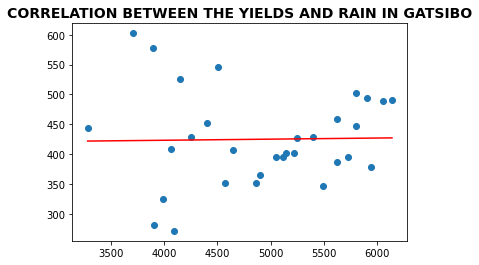

In [6]:

# plotting the data
plt.scatter(x, y)
  
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.title('CORRELATION BETWEEN THE YIELDS AND RAIN IN GATSIBO', fontsize = 14, weight = 'bold')
plt.savefig("Gatsibo_prep.png")
plt.show()

In [7]:
correlation = z.corr(x)
correlation

-0.32033476991625237

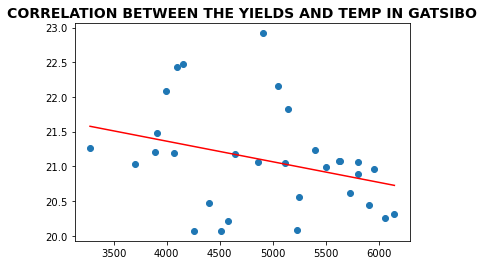

In [8]:


# plotting the data
plt.scatter(x, z)
  
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, z, 1))
         (np.unique(x)), color='red')
plt.title('CORRELATION BETWEEN THE YIELDS AND TEMP IN GATSIBO', fontsize = 14, weight = 'bold')
plt.savefig("Gatsibo_temp.png")
plt.show()
